# <center>Morningstar Stock Price Prediction using Recurrent Neural Networks (RNN)</center><br><center>R2 score = 93.11%</center>

## <b><u>Overview:</u></b>
<p><u>Company Background:</u>
<p>Morningstar, Inc. is a leading financial services firm providing investment research, data, and analysis. Founded in 1984 by Joe Mansueto, Morningstar has become a trusted source for investors, offering a wide range of products and services, including mutual fund and stock analysis, investment management, and financial advisory.</p>

<u>Market Position:</u>
<p>Morningstar has established itself as a key player in the financial industry, known for its independent and insightful investment research. The company has a global presence, serving individual investors, financial advisors, and institutions.</p>

<u>Initial Public Offering (IPO):</u>
<p>Morningstar went public on May 3, 2005, with its shares listed on the NASDAQ stock exchange under the ticker symbol "MORN."</p>

<u>Current Market Status:</u>
<p>As of Dec 1, 2023 the current value of MORN stock stands at $283.45.</p>

##<b>Objectives of Project</b>
This project aims to perform the following:</p>
<ul style="font-family:Georgia;padding:0px 50px 0px 50px;line-height:30px">
   <li>Data Collection: Collect historical stock data for Morningstar</li>
   <li>Data Preprocessing: Prepare the collected data for training by handling missing values,noise values, normalizing data, and creating time series sequences and ensuring the data is suitable for input into an RNN.</li>
   <li>Model Building: Employ an RNN architecture suitable for time series prediction and using Long Short-Term Memory (LSTM) to capture long-term dependencies in the data.</li>
   <li>Training: Split the dataset keeping the stock records of last 1 year as the test set and rest of the records starting from 2005 as the training set.</li>
   <li>Visually analysing the performance of the model and check if our model was able to accurately predict trends in our data</li>
   <li>Evaluation: Evaluate the model's performance using metrics such as Mean Squared Error (MSE) and R2 score</li>
</ul>

In [ ]:
# @title Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

Historical data downloaded from https://in.investing.com/equities/morningstar-historical-data?end_date=1701609913&st_date=973189800

In [ ]:
# @title Storing Historical Data in a Dataframe
MORN=pd.read_csv('/content/drive/MyDrive/RNN Morningstar Stock Price Predictions/MORN_StockPrice.csv')

In [ ]:
MORN.head()

,Date,Price,Open,High,Low,Volume,Chg%
0,"Dec 01, 2023",284.30,283.45,285.10,279.05,196.09K,0.33%
1,"Nov 30, 2023",283.36,280.80,283.40,279.65,178.66K,0.66%
2,"Nov 29, 2023",281.50,278.95,282.82,277.81,198.66K,1.34%
3,"Nov 28, 2023",277.79,278.49,280.05,276.86,83.96K,-0.53%
4,"Nov 27, 2023",279.28,276.48,280.32,273.35,232.38K,1.12%


In [ ]:
MORN.isnull().sum()

Date      0
Price     0
Open      0
High      0
Low       0
Volume    0
Chg%      0
dtype: int64

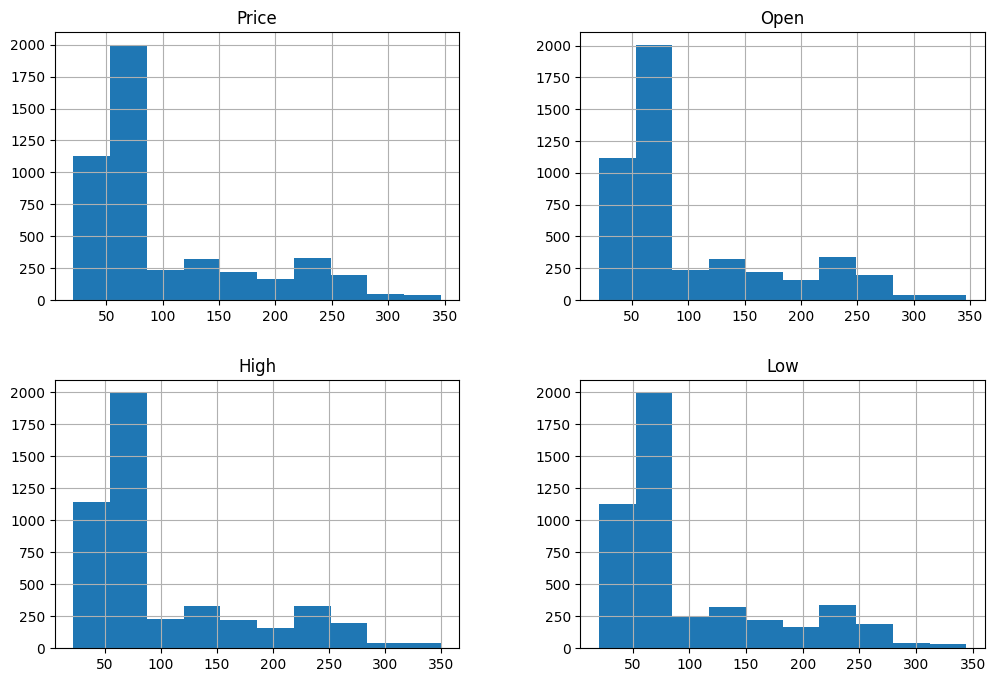

In [ ]:
# @title Checking distribution of open, close, low and high prices
MORN.hist(figsize=(12,8))
plt.show()

<font color='red'><b>On visually checking the csv file, I noticed the presence of noise values in the date column. there existed a few dates which ended with an 'E' or 'D' which denotes Earning and Dividend. However, these are not required in our analysis and will just cause unnecessary complications. Therefore we must go ahead and clean such noisy records.</b></font>

In [ ]:
# @title Checking the Noise in our data
MORN_Date_Noise=MORN[MORN['Date'].str.endswith(('E','D'))]

In [ ]:
MORN_Date_Noise['Date']

26      Oct 25, 2023 E
40      Oct 05, 2023 D
90      Jul 26, 2023 E
104     Jul 06, 2023 D
152     Apr 26, 2023 E
             ...      
2993    Jan 11, 2012 D
3055    Oct 12, 2011 D
3119    Jul 13, 2011 D
3181    Apr 13, 2011 D
3254    Dec 29, 2010 D
Name: Date, Length: 93, dtype: object

In [ ]:
# @title Cleaning our date column and converting it to Datetime format
import re
# Use regular expressions to extract the valid date part
MORN['Date'] = MORN['Date'].apply(lambda x: re.search(r'([a-zA-Z]+ \d{2}, \d{4})', x).group(1))
# Convert the 'date_column' to datetime format
MORN['Date'] = pd.to_datetime(MORN['Date'], format='%b %d, %Y')
# Format the datetime column to the desired format ("%Y-%m-%d")
MORN['Date'] = MORN['Date'].dt.strftime('%Y-%m-%d')
# Display the modified DataFrame
MORN.head()

,Date,Price,Open,High,Low,Volume,Chg%
0,2023-12-01,284.30,283.45,285.10,279.05,196.09K,0.33%
1,2023-11-30,283.36,280.80,283.40,279.65,178.66K,0.66%
2,2023-11-29,281.50,278.95,282.82,277.81,198.66K,1.34%
3,2023-11-28,277.79,278.49,280.05,276.86,83.96K,-0.53%
4,2023-11-27,279.28,276.48,280.32,273.35,232.38K,1.12%


In [ ]:
# @title Setting Date as the index
MORN['Date'] =  pd.to_datetime(MORN['Date'],format='%Y-%m-%d')
MORN = MORN.set_index('Date').to_period('D')

In [ ]:
MORN.head()

,Price,Open,High,Low,Volume,Chg%
Date,,,,,,
2023-12-01,284.30,283.45,285.10,279.05,196.09K,0.33%
2023-11-30,283.36,280.80,283.40,279.65,178.66K,0.66%
2023-11-29,281.50,278.95,282.82,277.81,198.66K,1.34%
2023-11-28,277.79,278.49,280.05,276.86,83.96K,-0.53%
2023-11-27,279.28,276.48,280.32,273.35,232.38K,1.12%


<font color='red'>For the purpose of our project we will be analysing only the Price column or the respective Closing Price for the specified dates.</font>

In [ ]:
# @title Filtering out only the Price Column
MORN=MORN[['Price']]

In [ ]:
MORN.head()

,Price
Date,
2023-12-01,284.30
2023-11-30,283.36
2023-11-29,281.50
2023-11-28,277.79
2023-11-27,279.28


In [ ]:
# @title Sorting our dataframe in ascending order of dates
MORN_sorted=MORN.sort_index(ascending=True)

In [ ]:
MORN_sorted.head()

,Price
Date,
2005-05-04,21.60
2005-05-05,22.64
2005-05-06,21.60
2005-05-09,20.77
2005-05-10,21.20


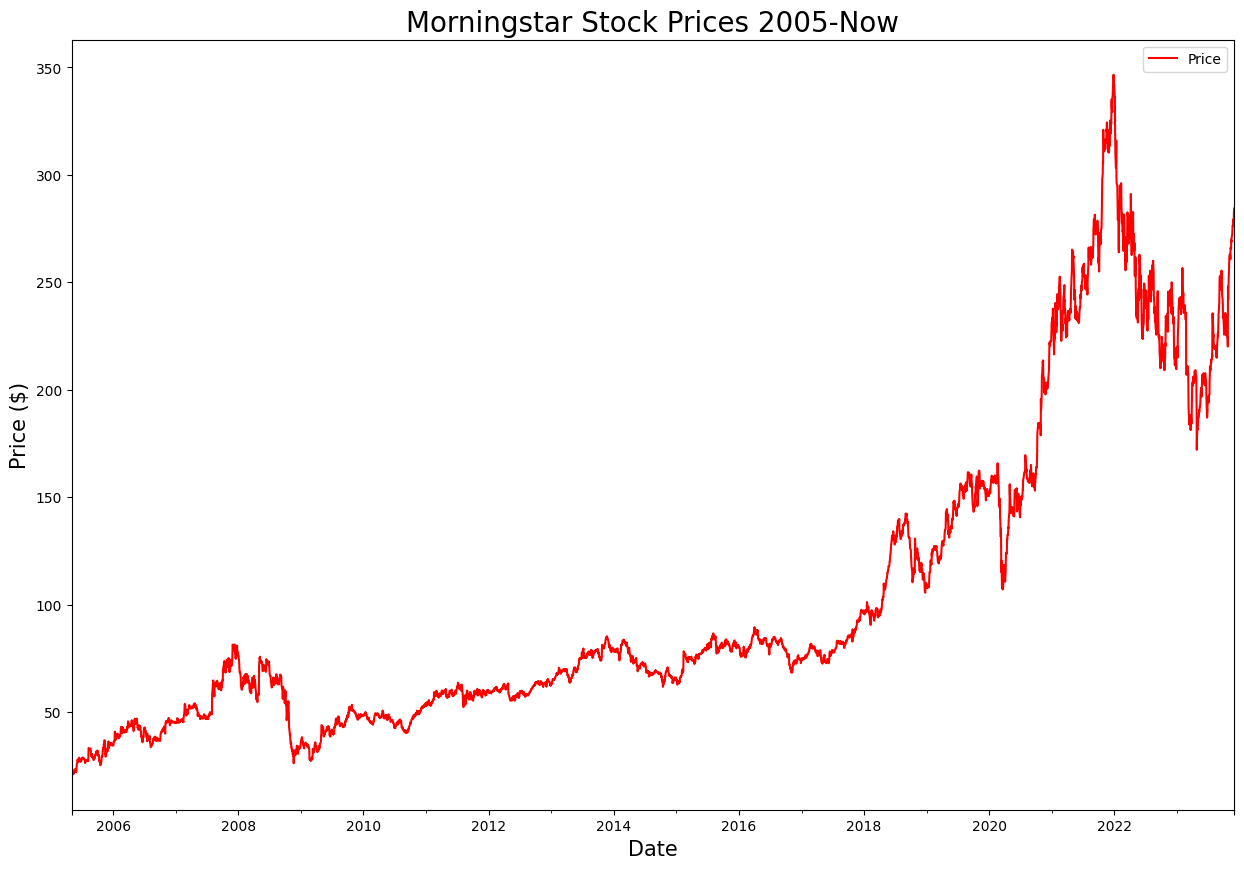

In [ ]:
# @title Morningstar Stock Price (2005 - 2023 DEC)
MORN_sorted.plot(figsize=(15,10),color='red')
plt.xlabel('Date',fontsize=15)
plt.ylabel('Price ($)',fontsize=15)
plt.title('Morningstar Stock Prices 2005-Now',fontsize=20)
plt.show()

In [ ]:
# @title Total Number of Records
len(MORN_sorted)

4679

In [ ]:
# @title Splitting our data into train and test set
test=MORN_sorted.iloc[-365:]
train=MORN_sorted.iloc[:-365]

In [ ]:
train,test

(             Price
 Date              
 2005-05-04   21.60
 2005-05-05   22.64
 2005-05-06   21.60
 2005-05-09   20.77
 2005-05-10   21.20
 ...            ...
 2022-06-14  229.51
 2022-06-15  234.50
 2022-06-16  223.60
 2022-06-17  228.40
 2022-06-21  230.72
 
 [4314 rows x 1 columns],
              Price
 Date              
 2022-06-22  233.85
 2022-06-23  242.21
 2022-06-24  249.41
 2022-06-27  245.42
 2022-06-28  237.94
 ...            ...
 2023-11-27  279.28
 2023-11-28  277.79
 2023-11-29  281.50
 2023-11-30  283.36
 2023-12-01  284.30
 
 [365 rows x 1 columns])

<font color='red'><b>Since RNN model can be trained only of a Numpy array, we must convert our training data to an appropriate format</b>

In [ ]:
# @title Converting our train set into a Numpy array
train=train.values

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# @title Scaling Data using MinMax Scaler
scaler= MinMaxScaler()

In [ ]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [ ]:
scaled_train[:5],scaled_test[:5]

(array([[0.00254726],
        [0.00573901],
        [0.00254726],
        [0.        ],
        [0.00131967]]),
 array([[0.65394058],
        [0.67959735],
        [0.70169408],
        [0.68944881],
        [0.66649276]]))

### <u>Purpose of Scaling Data for RNN Time-series Predictions: </u>
<p>1) <b>Gradient Descent Convergence:</b> Neural networks, including RNNs, often use optimization algorithms like gradient descent to minimize the loss function during training. These algorithms are sensitive to the scale of input features. Scaling helps in ensuring that the optimization converges faster and more reliably, as it prevents certain weights from dominating the learning process due to differences in scale.</p>
<p>2) <b>Improved Generalization:</b> Scaling can contribute to improved generalization by making the model less sensitive to variations in input feature magnitudes. This can lead to a more robust model that performs well on unseen data.</p>

In [ ]:
X_train=[]
y_train=[]
for i in range(60,len(train)):
  X_train.append(scaled_train[i-60:i,0])
  y_train.append(scaled_train[i,0])
X_train=np.array(X_train)
y_train=np.array(y_train)

#### <u>Function of above code:</u>
This piece of code represents part of a data preparation process for training a Recurrent Neural Network (RNN) to predict stock prices.<br>
<b>1)</b> It initializes empty lists X_train and y_train and uses a loop to create training samples. For each iteration, it appends a sequence of the past 60 days (2 months) stock prices (from index i-60 to i) to X_train and the stock price at the next time step (i) to y_train.<br>
<b>2)</b> After the loop, the lists are converted to NumPy arrays, where X_train contains sequences of 60 past stock prices, and y_train holds the corresponding stock prices at the next time step. <br><br>
This data preparation strategy forms the input-output pairs for training the RNN, enabling it to learn patterns in historical data to make predictions about future stock prices.

In [ ]:
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

#### <u>Purpose of reshaping X_train</u><br>
In the above code X_train has been reshaped to the format (batch_size, time_steps, input_features)<br><br>
<b>Batch Size:</b> Represents the number of sequences or samples processed together during each training iteration. It allows the model to learn from multiple sequences simultaneously, improving efficiency.

<b>Time Steps:</b> Refers to the number of past data points in each sequence. In the context of predicting stock prices, it's like saying, "Given the stock prices of the last 60 days, what will be the price on the next day?"

<b>Input Features:</b> Represents the number of features at each time step. In this case, it's 1 because each time step corresponds to a single stock price.

In [ ]:
# @title Importing necessary classes for RNN model creation
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### RNN Architecture
<p>RNNs are a type of neural network that can be used to model sequence data. RNNs, which are formed from feedforward networks, are similar to human brains in their behaviour. Simply said, recurrent neural networks can anticipate sequential data in a way that other algorithms can’t.</p>
<img src="https://editor.analyticsvidhya.com/uploads/33870quora.png">
<p>All of the inputs and outputs in standard neural networks are independent of one another, however in some circumstances, such as when predicting the next word of a phrase, the prior words are necessary, and so the previous words must be remembered. As a result, RNN was created, which used a Hidden Layer to overcome the problem. The most important component of RNN is the Hidden state, which remembers specific information about a sequence.</p>

RNNs have a Memory that stores all information about the calculations. It employs the same settings for each input since it produces the same outcome by performing the same task on all inputs or hidden layers.

RNNs are a type of neural network that has hidden states and allows past outputs to be used as inputs. They usually go like this:

<img src="https://editor.analyticsvidhya.com/uploads/47659standford.edu.png">

RNN architecture can vary depending on the problem you’re trying to solve. From those with a single input and output to those with many (with variations between).

Below are some examples of RNN architectures that can help you better understand this.
<ul>
<li>One To One: There is only one pair here. A one-to-one architecture is used in traditional neural networks.</li>
<li>One To Many: A single input in a one-to-many network might result in numerous outputs. One too many networks are used in the production of music, for example.</li>
<li>Many To One:  In this scenario, a single output is produced by combining many inputs from distinct time steps. Sentiment analysis and emotion identification use such networks, in which the class label is determined by a sequence of words.</li>
<li>Many To Many: For many to many, there are numerous options. Two inputs yield three outputs. Machine translation systems, such as English to French or vice versa translation systems, use many to many networks.</li>
</ul>

### RNN vs LSTM
<p>Recurrent Neural Networks (RNNs) and Long Short-Term Memory (LSTM) networks are both types of neural network architectures designed for processing sequential data. While RNNs have a simple structure that allows them to maintain a hidden state to capture information from previous time steps, they suffer from difficulties in learning long-range dependencies due to the vanishing gradient problem. LSTMs, on the other hand, are a specialized type of RNN designed to address this issue by incorporating memory cells and gating mechanisms. LSTMs excel in capturing and retaining important information over longer sequences, making them more effective in handling tasks with complex dependencies and mitigating the challenges associated with vanishing gradients. In essence, LSTMs are a more sophisticated extension of RNNs, providing enhanced capability for modeling and understanding sequential patterns in data.</p>

### What is Vanishing Gradient and how does LSTM help solve this?

The vanishing gradient problem is a challenge that arises during the training of deep neural networks, particularly in recurrent neural networks (RNNs). It occurs when the gradients of the loss function with respect to the model parameters become very small as they are backpropagated through the network during training. As a result, the weights of the network are updated very little or not at all, hindering the learning process.

In the context of RNNs, the vanishing gradient problem is more pronounced because the same set of weights is reused at each time step, and the gradients can diminish exponentially as they are propagated backward through time. This makes it difficult for the RNN to capture long-term dependencies in sequential data.

Long Short-Term Memory (LSTM) networks were specifically designed to address the vanishing gradient problem in RNNs. LSTMs introduce a more complex structure called a memory cell, which consists of three gates: input gate, forget gate, and output gate. These gates regulate the flow of information into, out of, and within the memory cell.

<img src="https://av-eks-blogoptimized.s3.amazonaws.com/Screenshot-from-2021-03-16-13-41-03.png">

<img src="https://av-eks-blogoptimized.s3.amazonaws.com/Screenshot-from-2021-03-16-13-45-35.png">


The key mechanisms that help LSTMs mitigate the vanishing gradient problem are the forget gate and the cell state. The forget gate allows the network to decide what information from the previous time step should be discarded or kept in the memory cell. This helps prevent unnecessary information from accumulating and causing vanishing gradients. The cell state acts as a conveyer belt, allowing information to be carried over long sequences without undergoing significant decay.

In [ ]:
# @title Initialising our Model
regressor = Sequential()

In [ ]:
# @title Creating first LSTM layer
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [ ]:
# @title Creating second LSTM layer
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [ ]:
# @title Creating third LSTM layer
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [ ]:
# @title Creating fourth LSTM layer
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [ ]:
# @title Creating output layer
regressor.add(Dense(units = 1))

In [ ]:
# @title Compiling the stacked LSTM model
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

#### Model Preparation:<br>
The purpose of the above pieces of code is to create a stacked Long Short-Term Memory (LSTM) neural network model for time series prediction<br>
1) <b>[regressor = Sequential()]</b> - The 'regressor' variable is an instance of the Sequential class from Keras, which is a high-level neural networks API.<br>
2) <b>[regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))]</b> - The first layer added to the model is an LSTM layer with 50 units (neurons) and return_sequences=True. This layer processes sequences of data and takes an input shape of (X_train.shape[1], 1), where X_train.shape[1] is the number of time steps in each sequence (60 in this case), and 1 is the number of features at each time step.<br>
3) <b>[regressor.add(Dropout(0.2))]</b> - A dropout layer is added after each LSTM layer. Dropout is a regularization technique that helps prevent overfitting by randomly setting a fraction of input units to zero during training.<br>
4) <b>[regressor.add(Dense(units = 1))]</b> - A fully connected dense layer with 1 unit is added. This layer produces the output of the neural network, which is a single value representing the predicted stock price.<br>
5) <b>[regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')]</b> - The model is compiled with the Adam optimizer and the mean squared error loss function. This configuration is common for regression problems, where the goal is to minimize the difference between predicted and actual values.


In [ ]:
# @title Model Training
history=regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
133/133 [==============================] - 33s 124ms/step - loss: 0.0043
Epoch 2/100
133/133 [==============================] - 16s 122ms/step - loss: 0.0014
Epoch 3/100
133/133 [==============================] - 16s 123ms/step - loss: 0.0013
Epoch 4/100
133/133 [==============================] - 16s 121ms/step - loss: 0.0012
Epoch 5/100
133/133 [==============================] - 16s 121ms/step - loss: 0.0011
Epoch 6/100
133/133 [==============================] - 17s 125ms/step - loss: 0.0011
Epoch 7/100
133/133 [==============================] - 16s 120ms/step - loss: 9.9625e-04
Epoch 8/100
133/133 [==============================] - 16s 124ms/step - loss: 9.6746e-04
Epoch 9/100
133/133 [==============================] - 16s 120ms/step - loss: 9.3130e-04
Epoch 10/100
133/133 [==============================] - 16s 121ms/step - loss: 9.0337e-04
Epoch 11/100
133/133 [==============================] - 16s 122ms/step - loss: 8.7043e-04
Epoch 12/100
133/133 [=====================

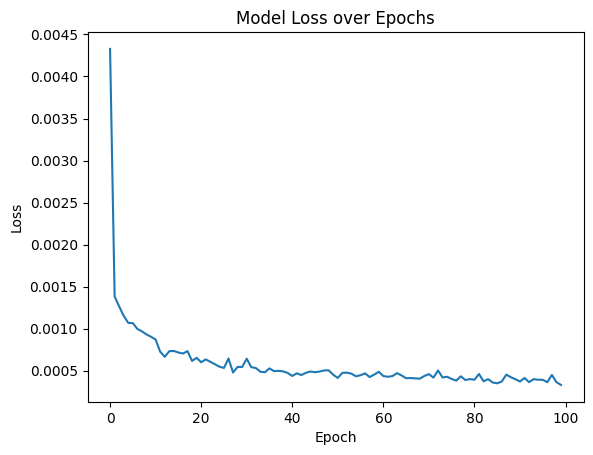

In [ ]:
# @title Visualizing loss per epoch
plt.plot(history.history['loss'])
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

<font color='red'>The loss represents the value of the loss function during the training process. In this case, the loss function depicts the mean squared error in the compilation step of the model. We observe that beyond 80 epochs, our MSE has stabilized.</font>

In [ ]:
# @title Testing our Model on the Test Set
dataset_test = test
real_stock_price = dataset_test.values
dataset_total = MORN_sorted
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)
X_test = []
for i in range(60, 425):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

12/12 [==============================] - 2s 33ms/step


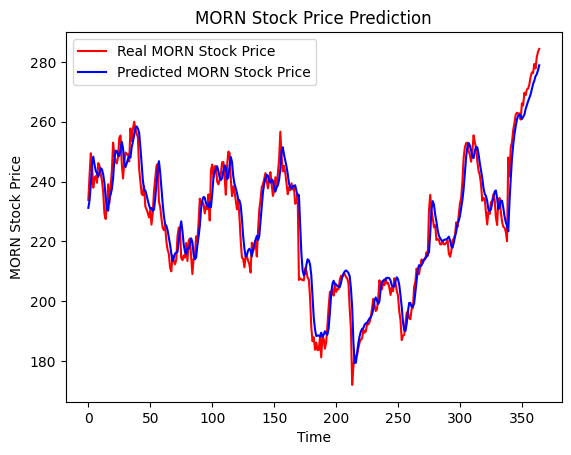

In [ ]:
# @title Visually analysing the Real and Predicted MORN Stock Prices for the Test Set
plt.plot(real_stock_price, color = 'red', label = 'Real MORN Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted MORN Stock Price')
plt.title('MORN Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('MORN Stock Price')
plt.legend()
plt.show()

In [ ]:
RealStockValues=MORN[365:]

In [ ]:
predicted_stock_price_with_dates=pd.DataFrame(predicted_stock_price,index=test.index)

In [ ]:
RealStockValues.index=RealStockValues.index.to_timestamp()
test.index=test.index.to_timestamp()
predicted_stock_price_with_dates.index=predicted_stock_price_with_dates.index.to_timestamp()

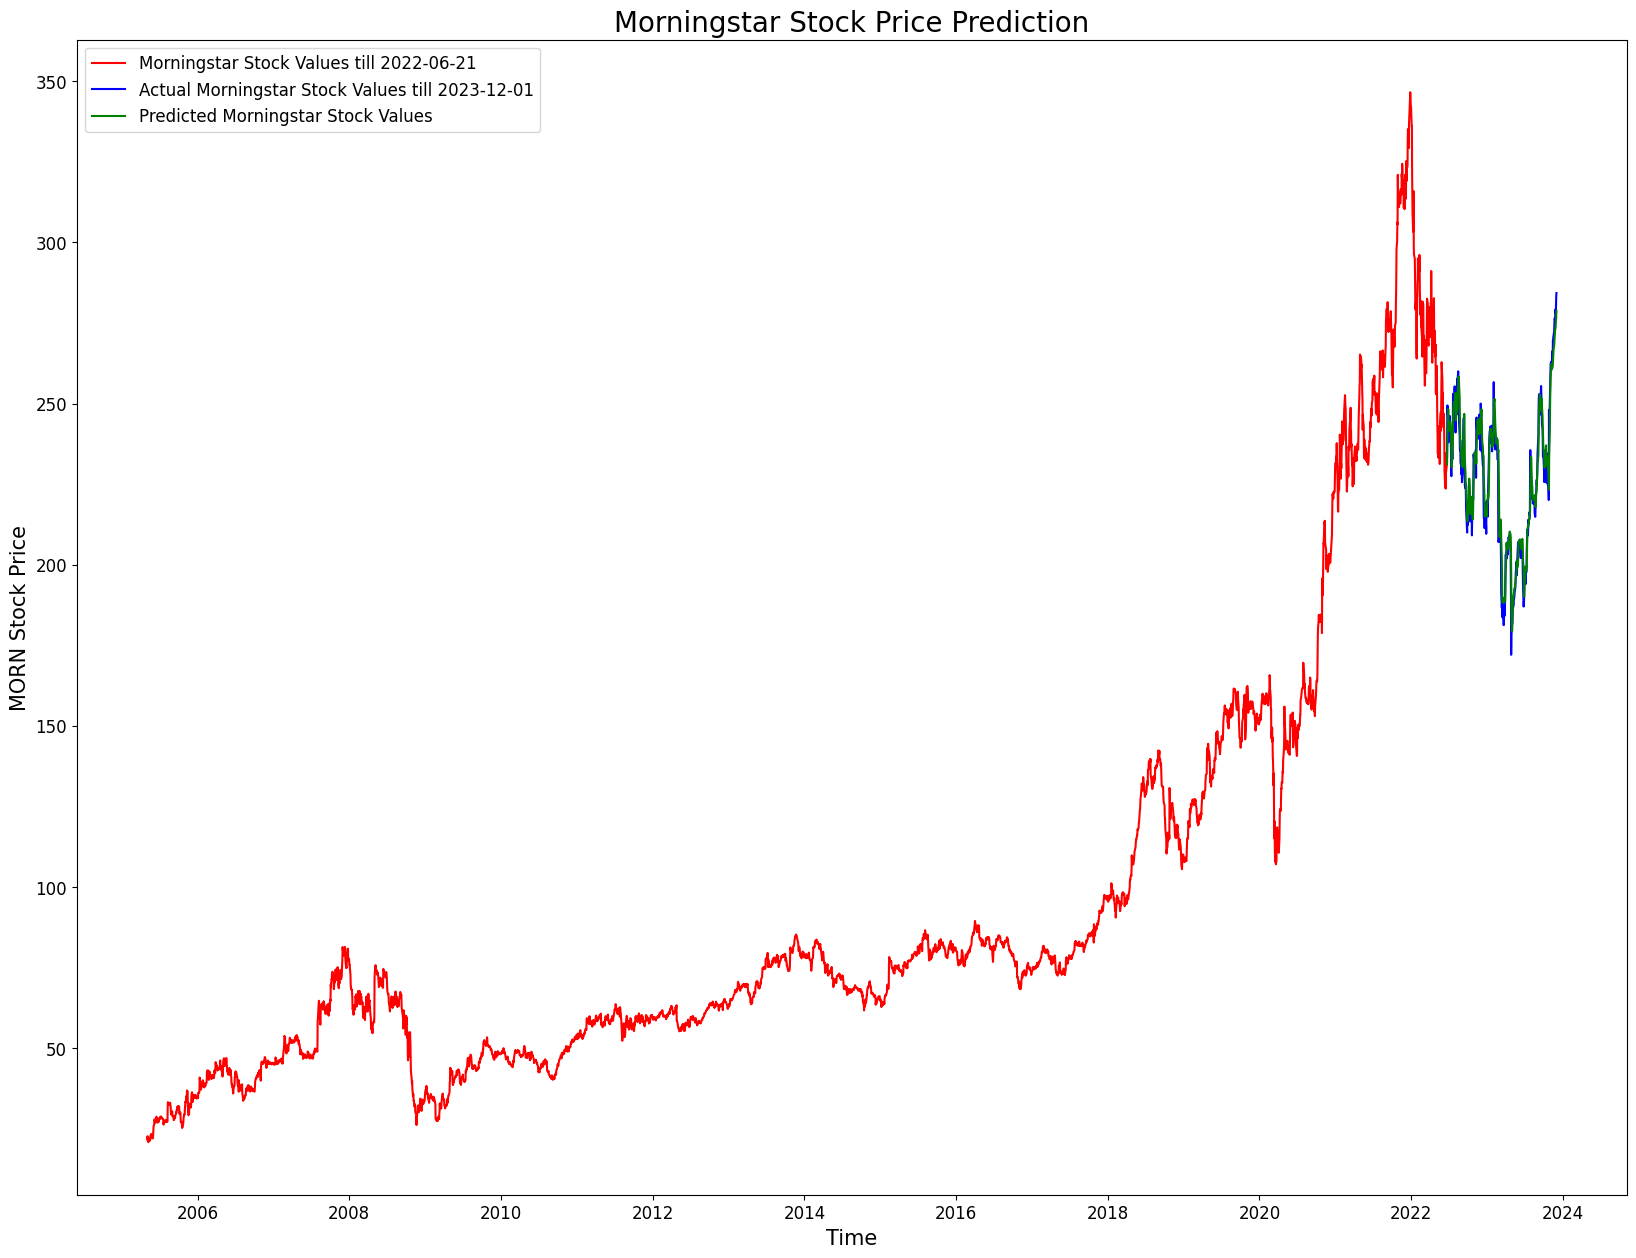

In [ ]:
# @title Visually Representing Model Performance w.r.t Training Data
plt.figure(figsize=(20,15))
plt.plot(RealStockValues, color='red', label='Morningstar Stock Values till 2022-06-21')
plt.plot(test, color='blue', label='Actual Morningstar Stock Values till 2023-12-01')
plt.plot(predicted_stock_price_with_dates, color='green', label='Predicted Morningstar Stock Values')
plt.title('Morningstar Stock Price Prediction',fontsize=20)
plt.xlabel('Time',fontsize=15)
plt.ylabel('MORN Stock Price',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize='large')
plt.show()

In [ ]:
# @title Evaluating Model Performance using R2 score
from sklearn.metrics import r2_score

r2 = round(r2_score(test, predicted_stock_price_with_dates)*100,2)
print(f'R-squared (R2) Score: {r2} %')

R-squared (R2) Score: 93.11 %


### <u>Conclusion:</u>
We see that our model was able to accurately predict trends in the stock prices of the last year. As a result it begs the question: "Can predictive models such as the above RNN model be used as a reliable source of prediction? Is it capable of having real-life significance." The simple answer would be 'No'. While models like the RNN (LSTM), ARIMA etc. can be powerful tools for analyzing time series data, including stock prices, it's important to recognize that predicting stock prices is an inherently challenging task. Reliance solely on machine learning models, for real-life trading decisions carries significant risks, and there are several factors to consider like:
<ul>
<li> <b>Market Dynamics:</b> Financial markets are influenced by a wide range of unpredictable factors, such as economic indicators, geopolitical events, news, and investor sentiment. These factors can cause rapid and unexpected changes in stock prices that may not be accurately captured by historical data alone.</li>
<li> <b>Human Factors and Behavioral Finance:</b> Human behaviors, emotions, and irrational decision-making can significantly impact financial markets. Models may struggle to capture these complex human factors, especially during times of market stress.</li>
<li> <b>Transaction Costs and Liquidity:</b> Real-world trading involves transaction costs, slippage, and liquidity considerations. Models need to account for these factors, especially in high-frequency trading scenarios.</li>
<li> <b>Diversification and Risk Management:</b> Relying on a single model for trading decisions can expose investors to concentrated risks. A diversified approach and effective risk management strategies are essential components of a robust trading strategy.</li>
<li> <b>Model Uncertainty:</b> No model is perfect, and all predictive models have inherent uncertainties. The predictions generated by RNNs are based on historical patterns and correlations, but these patterns may not persist in the future, especially in dynamic and evolving markets.</li>